In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [3]:
def random_data(beta, n, std_dev, maxval=100):

    # Generate X as an array of "n" samples which can take a value between 0 and 100
    x = np.random.rand(n) * maxval

    # Generate the random error of n samples, with a random value from a normal distribution,
    # with a standard deviation provided in the function argument.
    e = np.random.rand(n) * std_dev

    # Calculate "y" according to the equation discussed

    y = x * beta + e

    return x, y


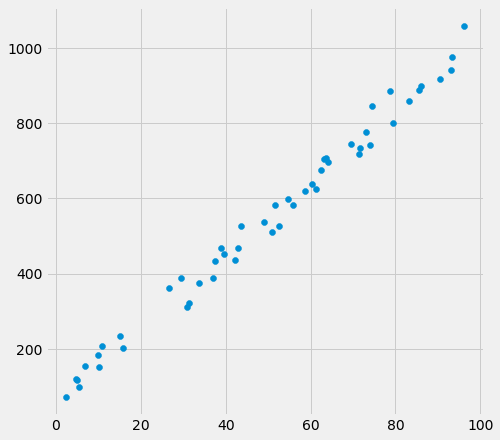

In [17]:
x, y = random_data(10, 50, 100)
x = pd.Series(x, name='x')
y = pd.Series(y, name='y')

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x, y)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

print('Size of train sample:', len(X_train))
print('Size of test sample:', len(X_test))

Size of train sample: 33
Size of test sample: 17


Gicen the dataset, we now maximize the log likelihood for observing x and y, subject to the parameters $m$ and $b$. The likelihood function is expressed as:

$$ \Pi_{i=0}^{N} \frac{1}{\sigma\sqrt{2\pi}} exp(-\frac{1}{2\sigma^2}(y_i - \theta^Tx_i)^2) $$

Taking a log on the above yields:

$$ \frac{N}{2}log(2\sigma^2\pi) - \frac{1}{2\sigma^2}\sum_{i=0}^{N}(y_i - \theta^Tx_i)^2 $$ 

Removing terms that don't depend on the parameters and reversing signs produces the following simplified term that we aim to minimize with respect to the parameter $\theta$ (in this case $m$ and $b$):

$$ \frac{1}{2\sigma^2}\sum_{i=0}^{N}(y_i - \theta^Tx_i)^2 $$

The minimization algorithm is described [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

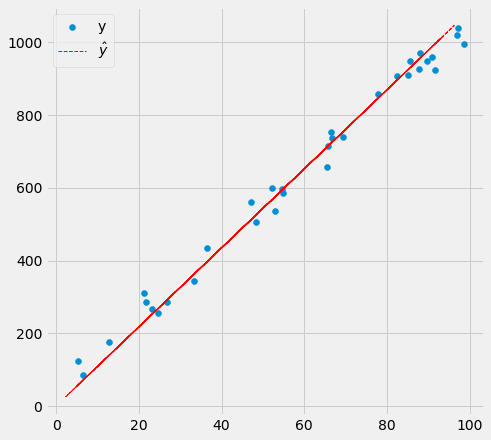

In [28]:
from scipy.optimize import minimize 

# a simplified computation of the negative log-likelihood, based on the derivation above.abs

def negative_ll(theta):
    (m, b, sigma) = theta

    y = m * X_train + b

    # Exponent from log-likelihood that we are trying to maximize
    # We negate the term so that we can minimize it.abs
    L = (1 / (2 * sigma ** 2) * sum(y - y_train) ** 2)

    return L

MLE = minimize(negative_ll, np.array([1, 1, 1]), method='L-BFGS-B')

(m, b, sigma) = MLE['x']

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X_train, y_train, label='y')
ax.plot(x, m * x + b, '--r', linewidth=1, label=r'$\hat{y}$')
ax.legend()
plt.show()